# Riming with w and saturation

Here only the polar night data is shown. The xtick labels were manually edited by removing some of the labels to provide better readability. 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd 
import seaborn as sns

## 1. Data

In [23]:
fig_path='../figures/'

# subset of processes which should be used later on:
fr_proc_list_sel = ["rime_fr"]
fr_proc_names_sel = ["Riming" ]

In [24]:
processed_data_path = '../../../data/processed/'

# load data
df_fr_tends = pd.read_csv(processed_data_path + 'df_fr_tends_NDJF_2122.csv')

In [25]:
df_fr_tends.iloc[:, 0:11] = df_fr_tends.iloc[:, 0:11].mask(df_fr_tends.iloc[:, 0:11] < 1e-18)

# divide each column by the total
df_fr_tends_perc = df_fr_tends[fr_proc_list_sel].div(df_fr_tends['total_fr'], axis=0)*100
# add the other columns
df_fr_tends_perc['T'] = df_fr_tends['T']
df_fr_tends_perc['W'] = df_fr_tends['W']
df_fr_tends_perc['sat_i'] = df_fr_tends['sat_i']

display(df_fr_tends_perc.describe())

,rime_fr,T,W,sat_i
count,7.042880e+05,5.277756e+06,5.142344e+06,5.269489e+06
mean,5.723247e+00,-1.222006e+01,4.963834e-02,9.859338e-01
std,1.384173e+01,6.384733e+00,3.112475e-01,1.214592e-01
min,1.059479e-08,-3.192815e+01,-1.663699e+00,0.000000e+00
25%,6.525025e-03,-1.663783e+01,-6.819423e-02,9.118008e-01
50%,1.346942e-01,-1.192581e+01,5.649089e-03,9.985472e-01
75%,2.276561e+00,-7.697784e+00,1.170884e-01,1.074271e+00
max,9.999419e+01,1.629741e+00,4.083391e+00,2.212094e+00


## 2. Plots

### 2.1 Saturation and Wind binning

In [26]:
sat_i_bins = np.arange(0.4, 1.5, 0.1)

df_fr_tends['SI_bins'] = pd.cut(df_fr_tends['sat_i'], bins=sat_i_bins)

# make labels for xticks
sat_i_bins_labels = sat_i_bins[0:-1]
print(sat_i_bins_labels)

df_fr_tends_perc['SI_bins'] = pd.cut(df_fr_tends_perc['sat_i'], bins=sat_i_bins)


[0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3]


In [27]:
w_bins = np.arange(-3, 3, 0.3)
df_fr_tends['W_bins'] = pd.cut(df_fr_tends['W'], bins=w_bins)

# xticks
w_bins_labels =np.arange(-2.9, 3, 0.3)

print(w_bins_labels)

df_fr_tends_perc['W_bins'] = pd.cut(df_fr_tends_perc['W'], bins=w_bins)

[-2.9 -2.6 -2.3 -2.  -1.7 -1.4 -1.1 -0.8 -0.5 -0.2  0.1  0.4  0.7  1.
  1.3  1.6  1.9  2.2  2.5  2.8]


Settings for plot so that same color is used as in others etc.

In [28]:
color_map = sns.color_palette("husl", 6)[::-1]
color_riming = color_map[4]

process = fr_proc_list_sel[0]
nrows=2
ncols=2

/tmp/ipykernel_200179/2287187013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[process] = np.abs(df_sub[process].copy())
/tmp/ipykernel_200179/2287187013.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[process] = np.log10(df_sub[process].copy())


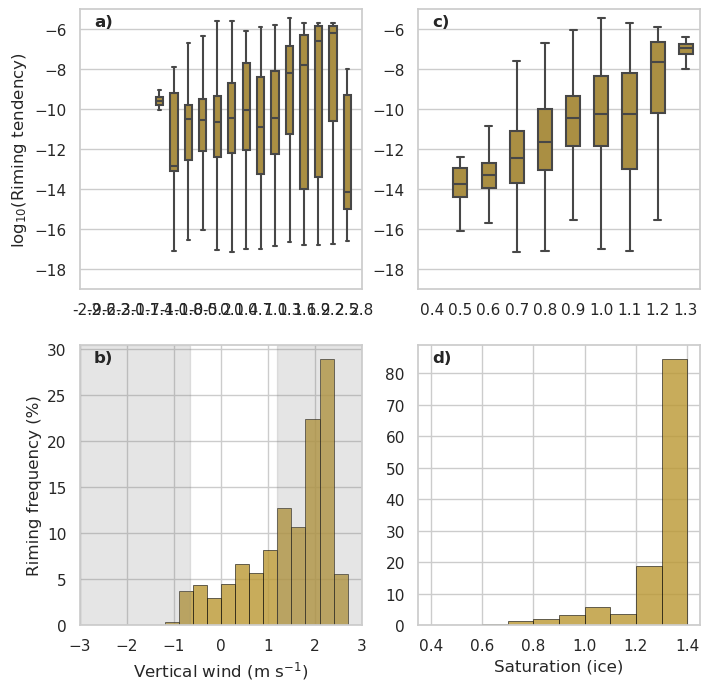

In [33]:
# create a figure with 4 subplots. They should be arranged in 2 rows and 2 columns
sns.set_theme(style="whitegrid")


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

df_sub = df_fr_tends[np.abs(df_fr_tends[process]) > 1e-18]
# convert to log scale
df_sub[process] = np.abs(df_sub[process].copy())
df_sub[process] = np.log10(df_sub[process].copy())

bx = sns.boxplot(ax=axes[0,0], x='W_bins', y=process, data=df_sub,
            color=color_riming, fliersize=0, width=0.5)
axes[0,0].set_ylim(-19, -5)
# Set the xticks and labels for every third value
axes[0,0].set_xticks(np.arange(0, len(w_bins_labels), 1))
axes[0,0].set_xticklabels(np.round(w_bins_labels,1))

bx = sns.boxplot(ax=axes[0,1], x='SI_bins', y=process, data=df_sub,
            color=color_riming, fliersize=0, width=0.5)
axes[0,1].set_ylim(-19, -5)
axes[0,1].set_ylabel('')
# make the xtick labels look nice
axes[0,1].set_xticklabels(np.round(sat_i_bins_labels,1))
axes[0,1].set_xticks(np.arange(0, len(sat_i_bins_labels), 1))

# Set the xticks and labels for every third value
#axes[0,1].set_xticks(np.arange(0, len(sat_i_bins_labels), 3))
#axes[0,1].set_xticklabels(np.round(sat_i_bins_labels[::3],3))


# plot with frequency of occurence
df_sub = df_fr_tends_perc[df_fr_tends_perc[process] > 1]
relative_occ = df_sub['W_bins'].value_counts().sort_index()/df_fr_tends_perc['W_bins'].value_counts().sort_index()*100
axes[1, 0].bar(w_bins[:-1],relative_occ, color=color_riming, width=0.3, align='edge', 
                       edgecolor='black', linewidth=0.5, alpha=0.8, label=process)
axes[1,0].set_xlim(-3, 3)

relative_occ = df_sub['SI_bins'].value_counts().sort_index()/df_fr_tends_perc['SI_bins'].value_counts().sort_index()*100
axes[1, 1].bar(sat_i_bins[:-1],relative_occ, color=color_riming, width=0.1, align='edge', 
                       edgecolor='black', linewidth=0.5, alpha=0.8, label=process)
#axes[1,1].set_xlim(0.4, 1.6)


axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')

axes[1,0].set_xlabel(r'Vertical wind (m s$^{-1}$)')
axes[1,1].set_xlabel(r'Saturation (ice)')
axes[0,0].set_ylabel(r'log$_{10}$(Riming tendency)')
axes[1,0].set_ylabel('Riming frequency (%)')

axes[0,0].text(0.05, 0.94, '(a)', transform=axes[0,0].transAxes, 
               size=12)
axes[1,0].text(0.05, 0.94, '(b)', transform=axes[1,0].transAxes,
                size=12)
# right column is c and d
axes[0,1].text(0.05, 0.94, '(c)', transform=axes[0,1].transAxes,
                size=12)
axes[1,1].text(0.05, 0.94, '(d)', transform=axes[1,1].transAxes,
                size=12)

# compute the lowest and highest 5% of the wind distribution
w_low = df_fr_tends_perc['W'].quantile(0.01)
w_high = df_fr_tends_perc['W'].quantile(0.99)

# mark the areas where the lowest 5% of the wind distribution is located and the highest 5% of the wind distribution
axes[1,0].axvspan(-3, w_low, alpha=0.2, color='grey')
axes[1,0].axvspan(w_high, 3, alpha=0.2, color='grey')


plt.savefig(fig_path + 'fig06_riming_w_sat.svg', dpi=300, bbox_inches='tight', format='svg')

plt.show()


In [34]:
print(w_high)

1.1945284925606756
